In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import csv
import pandas as pd

from tifffile import imsave, imread

In [2]:
detection = pd.read_csv('cell_detection_8.csv')
# print(detection)

In [3]:
centroids = detection[['X', 'Y', 'Slice']]
# centroids.rename(columns = {'Slice':'Z'}, inplace = True)
centroids.columns = ['x', 'y', 'z']
print(centroids)

          x       y   z
0     7.992   9.895   2
1     8.438   9.895   5
2     8.688   9.724  11
3     9.068  10.236  17
4     7.165  10.420  18
5     7.992  10.984  20
6     7.992  11.680  23
7     7.966  11.207  22
8     6.850  10.801   3
9     6.942  11.837   3
10    4.042  12.283   3
11    4.908  10.997   3
12    4.304  12.808   4
13    7.480  11.483  12
14    7.585  11.903  11
15    8.005  11.916  26
16    7.717  12.362  28
17    6.837  11.785  28
18    7.940  11.837  94
19    8.005  11.483  36
20    7.861  10.564  30
21    7.257  10.171  24
22    7.087  11.430  44
23    5.039  10.289  44
24    5.394  10.932  52
25    7.992  11.312  59
26    7.927  11.050  62
27    8.018  10.919  75
28    7.874  10.643  79
29    7.730  10.459  73
..      ...     ...  ..
159   9.619   5.945  95
160   7.638   4.383  58
161   7.454   4.055  58
162  10.381   4.488  23
163   7.349   4.423   6
164  10.131   5.512   2
165   8.346   6.037   4
166   7.402   6.194   4
167   6.903   6.391   6
168   9.764   3.

In [4]:
# z slices were 1 indexed, now make then 0
centroids['z'] -= 1
centroids['x'] *= (1000/39.37)
centroids['y'] *= (1000/39.37)

/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [5]:
print(centroids)

              x           y   z
0    202.997206  251.333503   1
1    214.325629  251.333503   4
2    220.675641  246.990094  10
3    230.327661  259.994920  16
4    181.991364  264.668529  17
5    202.997206  278.994158  19
6    202.997206  296.672593  22
7    202.336805  284.658369  21
8    173.990348  274.345949   2
9    176.327153  300.660401   2
10   102.667005  311.988824   2
11   124.663449  279.324359   2
12   109.321819  325.323851   3
13   189.992380  291.668783  11
14   192.659385  302.336805  10
15   203.327407  302.667005  25
16   196.012192  313.995428  27
17   173.660147  299.339599  27
18   201.676403  300.660401  93
19   203.327407  291.668783  35
20   199.669799  268.326137  29
21   184.328169  258.343917  23
22   180.010160  290.322581  43
23   127.990856  261.341123  43
24   137.007874  277.673355  51
25   202.997206  287.325375  58
26   201.346203  280.670561  61
27   203.657607  277.343155  74
28   200.000000  270.332741  78
29   196.342393  265.659131  72
..      

In [6]:
centroids.to_csv('cell_detection_8.csv')

# Checking and plotting centroids

In [7]:
img_stack = imread('../cell_detection_8.tif')
# print(img_stack)

## Checking Cell Detection 1

In [8]:
# s = img_stack[:,0:500,500:1000]
s = img_stack
cd1 = pd.read_csv('cell_detection_8.csv')
print(cd1)

     Unnamed: 0           x           y   z
0             0  202.997206  251.333503   1
1             1  214.325629  251.333503   4
2             2  220.675641  246.990094  10
3             3  230.327661  259.994920  16
4             4  181.991364  264.668529  17
5             5  202.997206  278.994158  19
6             6  202.997206  296.672593  22
7             7  202.336805  284.658369  21
8             8  173.990348  274.345949   2
9             9  176.327153  300.660401   2
10           10  102.667005  311.988824   2
11           11  124.663449  279.324359   2
12           12  109.321819  325.323851   3
13           13  189.992380  291.668783  11
14           14  192.659385  302.336805  10
15           15  203.327407  302.667005  25
16           16  196.012192  313.995428  27
17           17  173.660147  299.339599  27
18           18  201.676403  300.660401  93
19           19  203.327407  291.668783  35
20           20  199.669799  268.326137  29
21           21  184.328169  258

     Unnamed: 0           x           y  z
8             8  173.990348  274.345949  2
9             9  176.327153  300.660401  2
10           10  102.667005  311.988824  2
11           11  124.663449  279.324359  2
188         188  197.002794  253.340107  2


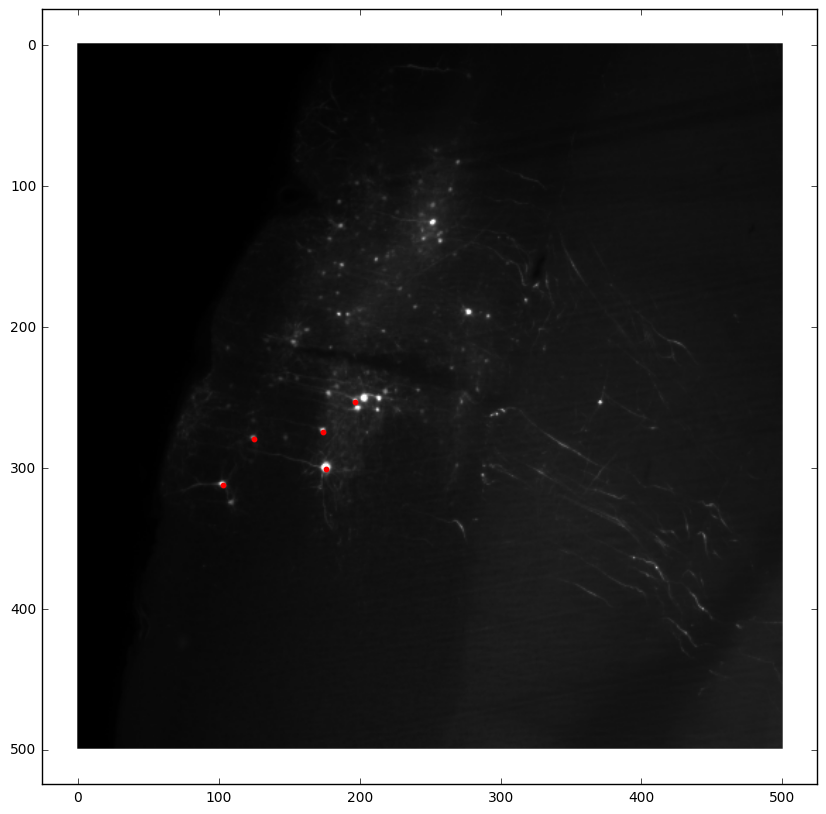

In [9]:
z_val = 2
cd1_slice = cd1[cd1['z'] == z_val]
print(cd1_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s[z_val,:,:], cmap='gray')
plt.scatter(cd1_slice['x'], cd1_slice['y'], s=10, color='red')
plt.show()

## Checking cell_detection_2

In [66]:
s2 = img_stack[:,500:1000,0:500]
cd2 = pd.read_csv('cell_detection_2.csv')
print(cd2)

    Unnamed: 0           x           y   z
0            0  145.999492  158.013716  51
1            1  332.004064   50.012700  60
2            2  180.010160   27.990856  61
3            3  173.990348  151.993904  61
4            4  304.013208   51.993904  51
5            5  181.330963  224.003048  54
6            6  341.325883   74.676149  54
7            7  429.337059  153.340107  53
8            8  281.330963   19.989840  59
9            9  288.011176   41.325883  84
10          10  491.998984  274.676149  82
11          11  438.658877  100.000000  91
12          12  459.994920  186.664973  93
13          13  419.989840   72.009144  87
14          14  488.011176  305.334011  58
15          15  300.000000   88.011176  63
16          16  221.336043   49.326899  28
17          17  275.996952   13.335027  36
18          18  388.011176   42.672085  47
19          19  496.012192  202.667005  46
20          20  454.660909  211.988824   4
21          21   66.675133  130.657861  43
22         

   Unnamed: 0           x           y   z
2           2  180.010160   27.990856  61
3           3  173.990348  151.993904  61


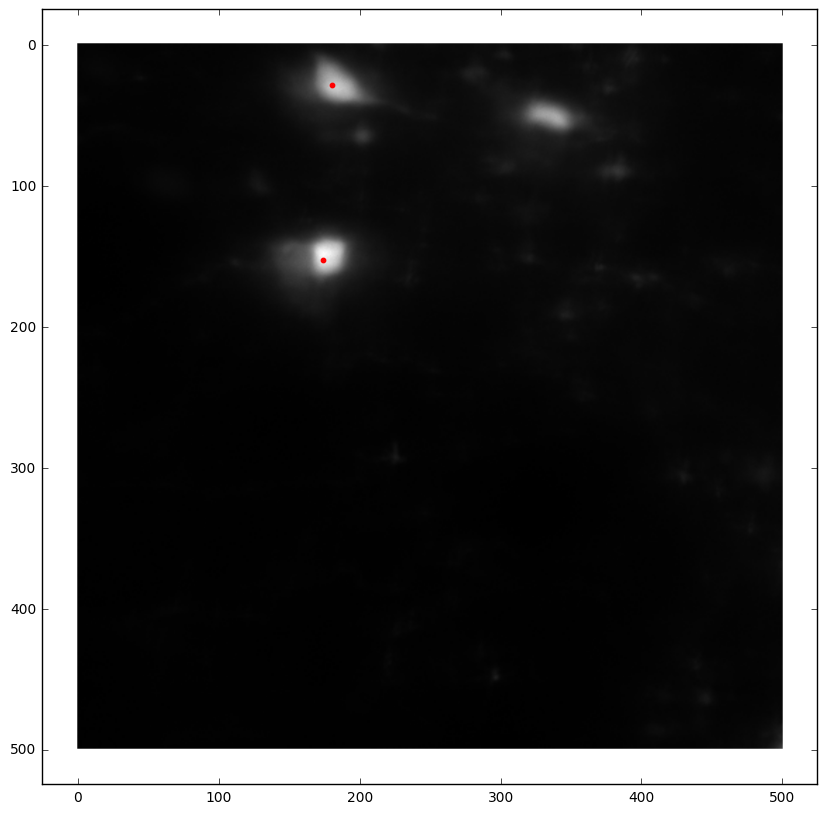

In [67]:
z_val = 61
cd2_slice = cd2[cd2['z'] == z_val]
print(cd2_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s2[z_val,:,:], cmap='gray')
plt.scatter(cd2_slice['x'], cd2_slice['y'], s=10, color='red')
plt.show()

    Unnamed: 0           x           y  z
25          25  175.996952  383.997968  1
27          27  478.663957  377.343155  1


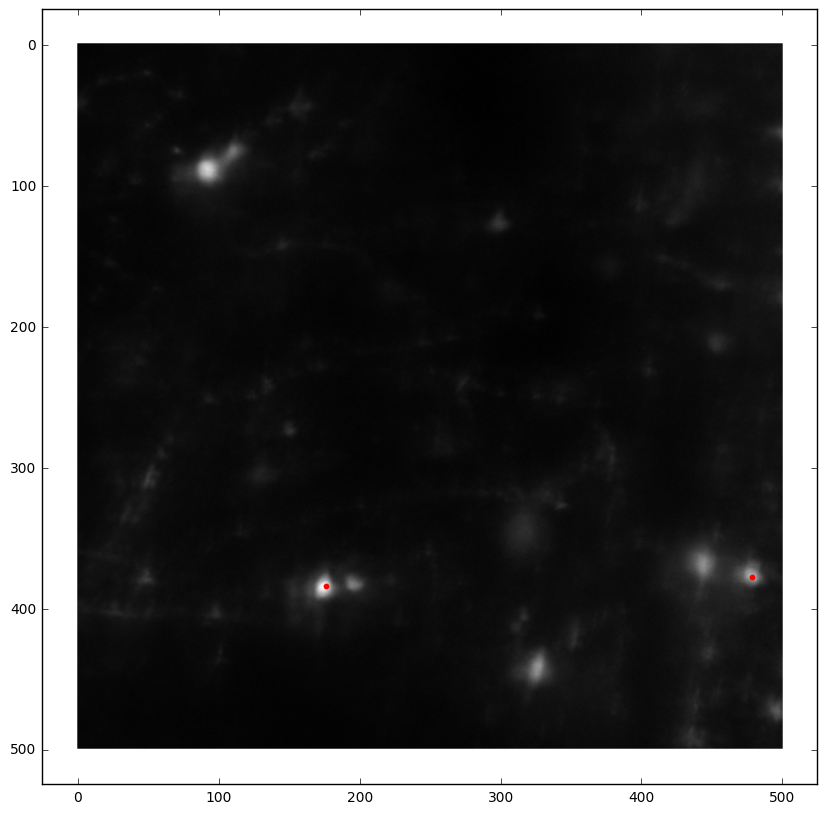

In [68]:
z_val = 1
cd2_slice = cd2[cd2['z'] == z_val]
print(cd2_slice)

plt.figure(figsize=(10, 10))
plt.imshow(s2[z_val,:,:], cmap='gray')
plt.scatter(cd2_slice['x'], cd2_slice['y'], s=10, color='red')
plt.show()


# Checking

In [39]:
import csv
import SimpleITK as sitk

In [35]:
img_stack = imread('../s3617_cutout.tif')
s = img_stack[:,0:500,500:1000]

In [21]:
a_centers = []
with open('cell_detection_1.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        a_centers.append([int(float(row[3])), int(float(row[2])), int(float(row[1]))])

In [30]:
cd1 = pd.read_csv('cell_detection_1.csv')
print(cd1)

    Unnamed: 0           x           y   z
0            0  250.012700  345.999492  61
1            1  108.001016   91.998984  51
2            2  229.337059  270.662941  52
3            3   51.993904  304.013208  54
4            4   21.336043  157.327915  68
5            5   40.005080  388.011176  80
6            6   40.005080  105.334011  87
7            7   25.323851  353.340107  84
8            8   29.337059  324.003048  85
9            9  127.990856  154.660909  81
10          10   51.993904   51.993904  80
11          11  106.680213  400.000000  58
12          12  404.013208  102.667005  54
13          13  412.014224  105.334011  54
14          14  250.673101  262.661925  57
15          15  282.677165   83.997968  60
16          16  319.989840  440.005080  65
17          17  154.660909  358.674117  70
18          18  294.665989  358.674117  73
19          19  446.659893  472.009144  73
20          20  122.656845  109.321819  73
21          21  108.001016  494.665989  74
22         

In [31]:
print(a_centers)

[[61, 345, 250], [51, 91, 108], [52, 270, 229], [54, 304, 51], [68, 157, 21], [80, 388, 40], [87, 105, 40], [84, 353, 25], [85, 324, 29], [81, 154, 127], [80, 51, 51], [58, 400, 106], [54, 102, 404], [54, 105, 412], [57, 262, 250], [60, 83, 282], [65, 440, 319], [70, 358, 154], [73, 358, 294], [73, 472, 446], [73, 109, 122], [74, 494, 108], [93, 322, 178], [98, 489, 209], [9, 288, 64], [12, 397, 49], [10, 337, 127], [12, 164, 178], [14, 129, 157], [11, 142, 149], [12, 332, 421], [13, 408, 145], [14, 469, 165], [13, 437, 1], [36, 397, 50], [37, 385, 181], [38, 488, 158], [37, 354, 98], [48, 493, 230], [48, 458, 135], [46, 169, 201], [46, 122, 190], [47, 110, 206], [46, 133, 38], [47, 64, 54], [6, 413, 308], [6, 457, 440], [20, 457, 327], [19, 272, 226], [19, 238, 96], [26, 234, 97], [32, 494, 2], [26, 269, 226], [19, 314, 9], [17, 359, 19], [23, 405, 126], [23, 430, 154], [23, 432, 73], [28, 169, 57], [49, 49, 43], [18, 72, 188], [20, 157, 173], [35, 238, 222], [44, 273, 224], [44, 377,

In [32]:
cd1Sorted = cd1.sort(['z'], ascending=False)
print(cd1Sorted)

    Unnamed: 0           x           y   z
23          23  209.347219  489.331979  98
22          22  178.663957  322.656845  93
6            6   40.005080  105.334011  87
8            8   29.337059  324.003048  85
7            7   25.323851  353.340107  84
9            9  127.990856  154.660909  81
5            5   40.005080  388.011176  80
10          10   51.993904   51.993904  80
21          21  108.001016  494.665989  74
19          19  446.659893  472.009144  73
20          20  122.656845  109.321819  73
18          18  294.665989  358.674117  73
17          17  154.660909  358.674117  70
4            4   21.336043  157.327915  68
16          16  319.989840  440.005080  65
0            0  250.012700  345.999492  61
15          15  282.677165   83.997968  60
11          11  106.680213  400.000000  58
14          14  250.673101  262.661925  57
13          13  412.014224  105.334011  54
12          12  404.013208  102.667005  54
3            3   51.993904  304.013208  54
2          

/Users/Kepler/anaconda/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


# Jason's code

In [ ]:
z_range, y_range, x_range = img_stack.shape
    for z,x,y in a_centers:
        for i in range(-3,4):
            for j in range(-3,4):
                for k in range(-3,4):
                    s3617_img[min(z+i, z_range-1), min(y+j, y_range-1), min(x+k, x_range-1)] = 0

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(s2[z_val,:,:], cmap='gray')
plt.scatter(cd2_slice['x'], cd2_slice['y'], s=10, color='red')
plt.show()

In [37]:
import SimpleITK as sitk

In [40]:
image = sitk.GetImageFromArray(s)
sitk.WriteImage(sitk.Cast(image, sitk.sitkUInt16), 'cell_detection_1_jon.tif')

In [48]:
s = img_stack[:,0:500,0:500]
image = sitk.GetImageFromArray(s)
sitk.WriteImage(sitk.Cast(image, sitk.sitkUInt16), 'cell_detection_0.tif')

In [49]:
s = img_stack[:,500:1000,0:500]
image = sitk.GetImageFromArray(s)
sitk.WriteImage(sitk.Cast(image, sitk.sitkUInt16), 'cell_detection_2.tif')

In [50]:
s = img_stack[:,500:1000,500:1000]
image = sitk.GetImageFromArray(s)
sitk.WriteImage(sitk.Cast(image, sitk.sitkUInt16), 'cell_detection_3.tif')

In [41]:
print(s)

[[[1480 1366 1494 ...,  752  755  819]
  [1407 1516 1518 ...,  791  813  800]
  [1521 1433 1528 ...,  790  863  837]
  ..., 
  [1441 1417 1467 ...,  776  853  876]
  [1553 1459 1625 ...,  807  772  857]
  [1554 1548 1521 ...,  786  834  780]]

 [[1423 1367 1507 ...,  735  812  874]
  [1370 1443 1516 ...,  766  812  748]
  [1377 1357 1535 ...,  827  850  840]
  ..., 
  [1356 1408 1475 ...,  848  783  806]
  [1361 1596 1565 ...,  771  736  743]
  [1512 1449 1530 ...,  818  741  726]]

 [[1366 1475 1390 ...,  814  800  808]
  [1533 1452 1503 ...,  812  756  873]
  [1385 1469 1446 ...,  840  772  819]
  ..., 
  [1315 1401 1525 ...,  766  745  837]
  [1458 1548 1471 ...,  770  789  770]
  [1396 1517 1454 ...,  795  833  826]]

 ..., 
 [[1779 1772 1682 ...,  836  933  988]
  [1579 1745 1730 ...,  851  952  936]
  [1644 1610 1775 ...,  942  979  900]
  ..., 
  [1718 1643 1769 ..., 1074 1013 1022]
  [1810 1623 1773 ...,  929 1028 1005]
  [1781 1786 1782 ..., 1124  984 1043]]

 [[1944 1879 1852

In [44]:
a = np.zeros((1,100,100))
# print(a)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

In [45]:
for i in xrange(0,100):
    a[0,20,i] = 255

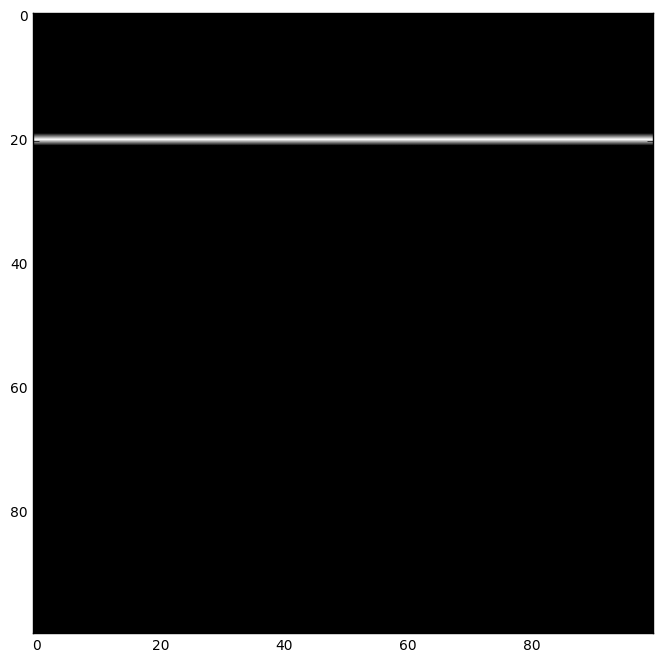

In [47]:
plt.figure(figsize=(8, 8))
plt.imshow(a[0,:,:], cmap='gray')
plt.show()